In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-05-13 01:24:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.250.81.208, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   144MB/s    in 1.3s    

2021-05-13 01:24:01 (144 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-05-13 01:24:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: 

In [ ]:
import tensorflow as tf

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-012.png', 'rock01-050.png', 'rock07-k03-019.png', 'rock04-084.png', 'rock04-117.png', 'rock07-k03-071.png', 'rock02-004.png', 'rock02-027.png', 'rock05ck01-010.png', 'rock03-045.png']
['paper06-001.png', 'paper06-096.png', 'paper02-058.png', 'paper05-018.png', 'paper01-058.png', 'paper02-067.png', 'paper03-105.png', 'paper04-065.png', 'paper05-080.png', 'paper06-064.png']
['scissors03-085.png', 'testscissors02-115.png', 'testscissors02-001.png', 'scissors02-106.png', 'testscissors01-064.png', 'scissors02-014.png', 'testscissors03-106.png', 'scissors03-035.png', 'scissors04-034.png', 'testscissors03-063.png']


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
train_dir = "/tmp/rps"
validation_dir = "/tmp/rps-test-set"

In [ ]:
train_data = ImageDataGenerator(rescale=1/255.0)
validation_data = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_generator = train_data.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 batch_size = 126,
                                                 class_mode = "categorical")

Found 2520 images belonging to 3 classes.


In [ ]:
validation_gen = validation_data.flow_from_directory(validation_dir,
                                                     target_size= (150,150),
                                                     batch_size = 31,
                                                     class_mode = 'categorical')

Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(32,activation='relu'),
                                    tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 64)       

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=["accuracy"])

In [ ]:
iteration = model.fit(train_generator,
                      steps_per_epoch = 20,
                      epochs = 50,
                      validation_data=validation_gen,
                      validation_steps =12)

Epoch 1/50
20/20 [==============================] - 11s 505ms/step - loss: 1.1258 - accuracy: 0.3716 - val_loss: 1.0621 - val_accuracy: 0.3199
Epoch 2/50
20/20 [==============================] - 10s 492ms/step - loss: 0.8230 - accuracy: 0.6102 - val_loss: 0.5365 - val_accuracy: 0.7903
Epoch 3/50
20/20 [==============================] - 10s 495ms/step - loss: 0.1896 - accuracy: 0.9512 - val_loss: 0.2338 - val_accuracy: 0.9274
Epoch 4/50
20/20 [==============================] - 10s 491ms/step - loss: 0.0986 - accuracy: 0.9656 - val_loss: 0.4248 - val_accuracy: 0.8253
Epoch 5/50
20/20 [==============================] - 10s 492ms/step - loss: 0.0460 - accuracy: 0.9890 - val_loss: 0.3155 - val_accuracy: 0.8387
Epoch 6/50
20/20 [==============================] - 10s 494ms/step - loss: 0.0134 - accuracy: 0.9945 - val_loss: 0.3453 - val_accuracy: 0.8683
Epoch 7/50
20/20 [==============================] - 10s 492ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3768 - val_accuracy: 0.8710

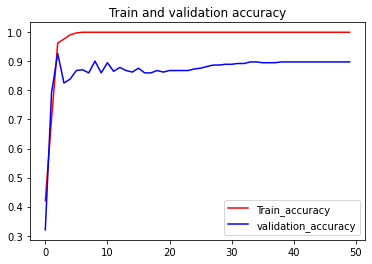

In [ ]:
import matplotlib.pyplot as plt
train_acc = iteration.history["accuracy"]
validation_acc = iteration.history['val_accuracy']
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, "r", label = "Train_accuracy")
plt.plot(epochs, validation_acc, "b", label = "validation_accuracy")
plt.title("Train and validation accuracy")
plt.legend(loc=0)
plt.show()

The above model is overfittig the training data

**Now lets use Dropout method to avoid the overfitting the training data**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding="same", activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.8),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(32,activation='relu'),
                                    tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 37, 37, 64)        73792     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 18, 18, 64)       

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=["accuracy"])

In [ ]:
geo = model.fit(train_generator,
                      steps_per_epoch = 20,
                      epochs = 50,
                      validation_data=validation_gen,
                      validation_steps =12)

Epoch 1/50
20/20 [==============================] - 11s 497ms/step - loss: 1.0964 - accuracy: 0.3597 - val_loss: 1.0743 - val_accuracy: 0.3790
Epoch 2/50
20/20 [==============================] - 10s 484ms/step - loss: 0.8820 - accuracy: 0.5721 - val_loss: 0.7151 - val_accuracy: 0.7231
Epoch 3/50
20/20 [==============================] - 10s 489ms/step - loss: 0.3400 - accuracy: 0.8688 - val_loss: 0.3960 - val_accuracy: 0.8387
Epoch 4/50
20/20 [==============================] - 10s 487ms/step - loss: 0.1098 - accuracy: 0.9606 - val_loss: 0.1428 - val_accuracy: 0.9570
Epoch 5/50
20/20 [==============================] - 10s 486ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.1185 - val_accuracy: 0.9462
Epoch 6/50
20/20 [==============================] - 10s 484ms/step - loss: 0.0267 - accuracy: 0.9891 - val_loss: 0.0732 - val_accuracy: 0.9758
Epoch 7/50
20/20 [==============================] - 10s 482ms/step - loss: 0.0177 - accuracy: 0.9923 - val_loss: 0.1837 - val_accuracy: 0.9409

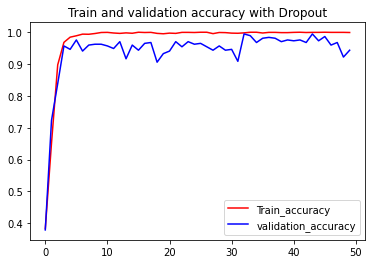

In [ ]:
import matplotlib.pyplot as plt
train_acc = geo.history["accuracy"]
validation_acc = geo.history['val_accuracy']
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, "r", label = "Train_accuracy")
plt.plot(epochs, validation_acc, "b", label = "validation_accuracy")
plt.title("Train and validation accuracy with Dropout")
plt.legend(loc=0)
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper1.png to paper1 (1).png
Saving paper2.png to paper2.png
Saving paper3.png to paper3 (1).png
Saving paper4.png to paper4.png
Saving paper5.png to paper5 (1).png
Saving paper6.png to paper6.png
Saving paper7.png to paper7 (1).png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1 (1).png
Saving rock2.png to rock2 (1).png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5 (1).png
Saving rock6.png to rock6 (1).png
Saving rock7.png to rock7.png
Saving rock8.png to rock8 (1).png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2 (1).png
Saving scissors3.png to scissors3 (1).png
Saving scissors4.png to scissors4 (1).png
Saving scissors5.png to scissors5 (1).png
Saving scissors6.png to scis